In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 

df = pd.read_csv("liana_stats.txt", sep='\t')

In [6]:
df.head(20)

,bin,count-d0,count-d3
0,0.00,281,290
1,0.01,280,281
2,0.02,256,264
3,0.03,272,246
4,0.04,276,275
5,0.05,243,258
6,0.06,282,261
7,0.07,279,256
8,0.08,260,204
9,0.09,244,252


In [7]:
df['count-d0-perc']=100*(df['count-d0']/df['count-d0'].sum())
df['count-d3-perc']=100*(df['count-d3']/df['count-d3'].sum())

In [8]:
df.head()

,bin,count-d0,count-d3,count-d0-perc,count-d3-perc
0,0.00,281,290,2.049449,2.343245
1,0.01,280,281,2.042156,2.270524
2,0.02,256,264,1.867114,2.133161
3,0.03,272,246,1.983809,1.987718
4,0.04,276,275,2.012982,2.222043


(1.0, 3.0)

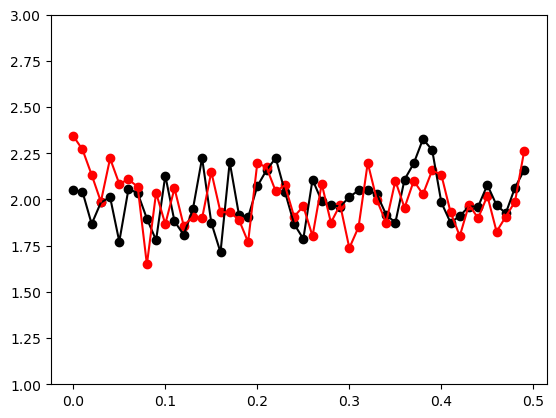

In [9]:
plt.scatter(df['bin'], df['count-d0-perc'], color="black")
plt.plot(df['bin'], df['count-d0-perc'], color="black")
plt.scatter(df['bin'], df['count-d3-perc'], color="red")
plt.plot(df['bin'], df['count-d3-perc'], color="red")
plt.ylim(1,3)

In [22]:
ttest_results=[]
for size in [3,4,5,6]:
    # create bins
    n=len(df['bin'])
    print(size)
    for i in range(0, n, size):
        if(i+(size-1) < n):
            bin_ = list(df.iloc[i:i+size,:]['bin'])
            d0=df.iloc[i:i+size,:]['count-d0-perc']
            d3=df.iloc[i:i+size,:]['count-d3-perc']
            
            res1=stats.ttest_rel(d0, d3, alternative='less') 
            res2=stats.ttest_rel(d0, d3, alternative='two-sided')
            
            ttest_results.append([size, bin_[0], bin_[-1], res1.pvalue, res2.pvalue])
            
            

3
4
5
6


In [23]:
df_res = pd.DataFrame(ttest_results, columns=['bin-size','st','end','pvalue-one', 'pvalue-two'])

In [24]:
df_res

,bin-size,st,end,pvalue-one,pvalue-two
0,3,0.00,0.02,0.002584,0.005167
1,3,0.03,0.05,0.096557,0.193113
2,3,0.06,0.08,0.683083,0.633835
3,3,0.09,0.11,0.378387,0.756773
4,3,0.12,0.14,0.775210,0.449580
5,3,0.15,0.17,0.356278,0.712555
6,3,0.18,0.20,0.554179,0.891642
7,3,0.21,0.23,0.705543,0.588914
8,3,0.24,0.26,0.572706,0.854588
9,3,0.27,0.29,0.481434,0.962867


In [25]:
df_res.to_csv("pvalues.txt", sep='\t', index=False)

In [26]:
df_res[df_res['pvalue-one']<0.05]

,bin-size,st,end,pvalue-one,pvalue-two
0,3,0.0,0.02,0.002584,0.005167
16,4,0.0,0.03,0.028909,0.057817
28,5,0.0,0.04,0.008709,0.017419
38,6,0.0,0.05,0.002489,0.004979
